In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_csv('C://Users//ANIL KUMAR//OneDrive//Desktop//NHANES.csv')

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
eda = df.loc[: , ['SMQ020' , 'RIAGENDR','RIDAGEYR' , 'DMDMARTL', 'DMDEDUC2' ,'BMXWT', 'BMXBMI' , 'BMXHT' , 'BPXSY1']]

In [5]:
eda.head()

,SMQ020,RIAGENDR,RIDAGEYR,DMDMARTL,DMDEDUC2,BMXWT,BMXBMI,BMXHT,BPXSY1
0,1,1,62,1.0,5.0,94.8,27.8,184.5,128.0
1,1,1,53,3.0,3.0,90.4,30.8,171.4,146.0
2,1,1,78,1.0,3.0,83.4,28.8,170.1,138.0
3,2,2,56,6.0,5.0,109.8,42.4,160.9,132.0
4,2,2,42,3.0,4.0,55.2,20.3,164.9,100.0


In [6]:
cols = {'SMQ020': 'Smoking' , 'RIAGENDR': 'Gende','RIDAGEYR': 'Age' , 'DMDMARTL': 'Martial statues', 'DMDEDUC2': 'Education level' ,'BMXWT':'Weight', 'BMXBMI': 'BMI' , 'BMXHT': 'Height' , 'BPXSY1': 'Systolic Blood Preasure'}

In [7]:
cols

{'SMQ020': 'Smoking',
 'RIAGENDR': 'Gende',
 'RIDAGEYR': 'Age',
 'DMDMARTL': 'Martial statues',
 'DMDEDUC2': 'Education level',
 'BMXWT': 'Weight',
 'BMXBMI': 'BMI',
 'BMXHT': 'Height',
 'BPXSY1': 'Systolic Blood Preasure'}

In [8]:
eda.rename(columns=cols).head(2)

,Smoking,Gende,Age,Martial statues,Education level,Weight,BMI,Height,Systolic Blood Preasure
0,1,1,62,1.0,5.0,94.8,27.8,184.5,128.0
1,1,1,53,3.0,3.0,90.4,30.8,171.4,146.0


In [9]:
eda.columns = ['Smoking' , 'Gender' , 'Age' , 'Martial Statues' ,'Education Level' ,'Weight' , 'BMI', 'Height' , 'Systolic Blood Preasure']

In [10]:
eda.head(2)

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,1,1,62,1.0,5.0,94.8,27.8,184.5,128.0
1,1,1,53,3.0,3.0,90.4,30.8,171.4,146.0


# Data Cleaning

In [12]:
eda['Education Level'].value_counts()

Education Level
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64

In [13]:
eda['Education Level'].apply(lambda x: '6th Class' if x == 1 else ( '10th Class' if x == 2 else ( 
    'Inter' if x == 3 else ( 'UG' if x == 4 else ( 'PG' if x == 5 else 'Illiteracy'))))).head()

0       PG
1    Inter
2    Inter
3       PG
4       UG
Name: Education Level, dtype: object

In [14]:
el = {2: '6th Class', 3: '10th Class', 4: 'Inter', 5: 'UG', 9: 'PG', 1: 'Illiteracy' }

In [15]:
eda['Education Level'].replace(el,inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\1824414959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Education Level'].replace(el,inplace=True)


In [16]:
eda.head(2)

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,1,1,62,1.0,UG,94.8,27.8,184.5,128.0
1,1,1,53,3.0,10th Class,90.4,30.8,171.4,146.0


In [17]:
eda['Gender'].value_counts()

Gender
2    2976
1    2759
Name: count, dtype: int64

In [18]:
eda['Gender'].apply(lambda x: 'Female' if x == 1 else 'Male').head(2)

0    Female
1    Female
Name: Gender, dtype: object

In [19]:
gen = {1: 'Female', 2: 'Male'}

In [20]:
eda['Gender'].replace(gen,inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\214392425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Gender'].replace(gen,inplace=True)


In [21]:
eda.head(2)

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,1,Female,62,1.0,UG,94.8,27.8,184.5,128.0
1,1,Female,53,3.0,10th Class,90.4,30.8,171.4,146.0


In [22]:
eda['Smoking'].value_counts()

Smoking
2    3406
1    2319
9       8
7       2
Name: count, dtype: int64

In [23]:
eda['Smoking'].apply(lambda x: 'No' if x == 1 else ( 'Yes' if x == 2 else 'Refused')).head(2)

0    No
1    No
Name: Smoking, dtype: object

In [24]:
sm = {1: 'No', 2: 'Yes', 7|9: 'Refused'}

In [25]:
eda['Smoking'].replace(sm,inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\3188930335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Smoking'].replace(sm,inplace=True)


In [26]:
eda.head(2)

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,No,Female,62,1.0,UG,94.8,27.8,184.5,128.0
1,No,Female,53,3.0,10th Class,90.4,30.8,171.4,146.0


In [27]:
eda['Martial Statues'].value_counts()

Martial Statues
1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: count, dtype: int64

In [28]:
eda['Martial Statues'].replace({1: 'Unarried',2: 'Livin', 3: "Divorced", 4: "Separated", 5: "Married", 6: "Divorced", 77: 'Trans'},inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\3854360041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Martial Statues'].replace({1: 'Unarried',2: 'Livin', 3: "Divorced", 4: "Separated", 5: "Married", 6: "Divorced", 77: 'Trans'},inplace=True)


In [29]:
eda.head(3)

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,No,Female,62,Unarried,UG,94.8,27.8,184.5,128.0
1,No,Female,53,Divorced,10th Class,90.4,30.8,171.4,146.0
2,No,Female,78,Unarried,10th Class,83.4,28.8,170.1,138.0


In [30]:
eda.duplicated().sum()

0

In [31]:
eda['Martial Statues'].mode()

0    Unarried
Name: Martial Statues, dtype: object

In [32]:
eda['Martial Statues'] = eda['Martial Statues'].fillna(eda['Martial Statues'].mode()[0])

In [33]:
eda.isna().sum()

Smoking                      0
Gender                       0
Age                          0
Martial Statues              0
Education Level            261
Weight                      69
BMI                         73
Height                      62
Systolic Blood Preasure    334
dtype: int64

In [34]:
eda['Education Level'].mode()

0    Inter
Name: Education Level, dtype: object

In [35]:
eda['Education Level'].fillna('Inter',inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\4021870714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Education Level'].fillna('Inter',inplace=True)


In [36]:
eda[eda['Education Level'].isna()]

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure


In [37]:
eda.isna().sum()

Smoking                      0
Gender                       0
Age                          0
Martial Statues              0
Education Level              0
Weight                      69
BMI                         73
Height                      62
Systolic Blood Preasure    334
dtype: int64

In [38]:
eda[['Weight','BMI','Height','Systolic Blood Preasure']].median()

Weight                      78.2
BMI                         28.3
Height                     166.0
Systolic Blood Preasure    122.0
dtype: float64

In [39]:
eda[['Weight','BMI','Height','Systolic Blood Preasure']] = eda[['Weight','BMI','Height','Systolic Blood Preasure']].fillna(
    eda[['Weight','BMI','Height','Systolic Blood Preasure']].median()
)

In [40]:
eda.isna().sum()

Smoking                    0
Gender                     0
Age                        0
Martial Statues            0
Education Level            0
Weight                     0
BMI                        0
Height                     0
Systolic Blood Preasure    0
dtype: int64

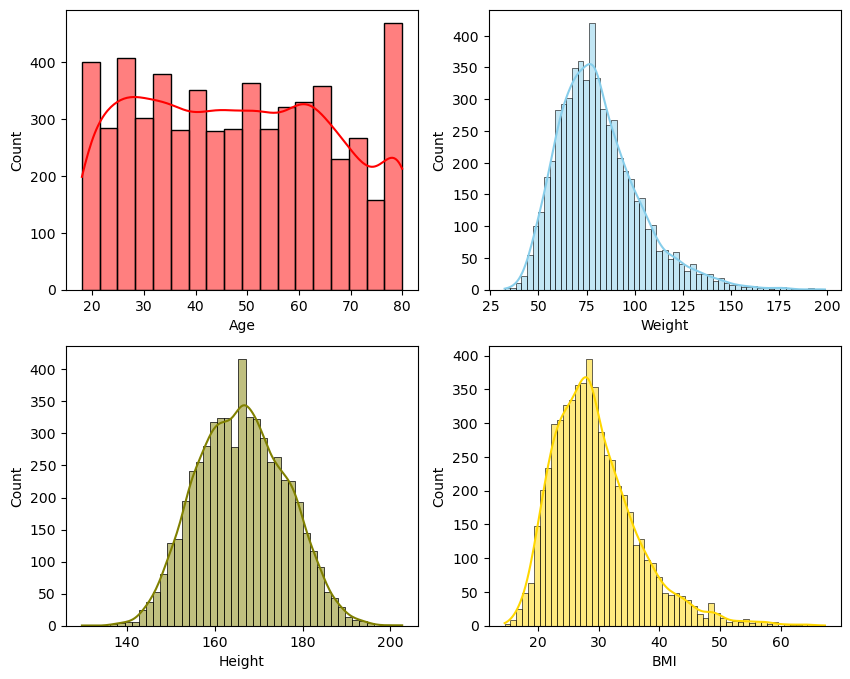

In [41]:
# Create histogram for quantitative variables
fig, axs = plt.subplots(2,2, figsize=(10, 8))
      
sns.histplot(data= eda, x="Age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= eda, x="Weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= eda, x="Height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= eda, x="BMI", kde=True, color="gold", ax=axs[1,1])

plt.show()

# Outliers

In [43]:
print(eda['Age'].min())
print(eda['Age'].max())

18
80


In [44]:
print(eda['Weight'].min())
print(eda['Weight'].max())

32.4
198.9


In [45]:
print(eda['Weight'].quantile(0.01))
print(eda['Weight'].quantile(0.99))

45.568000000000005
147.56599999999997


In [93]:
eda['Weight'].clip(lower=eda['Weight'].quantile(0.01), upper=eda['Weight'].quantile(0.99), inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_5548\1408074423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda['Weight'].clip(lower=eda['Weight'].quantile(0.01), upper=eda['Weight'].quantile(0.99), inplace=True)


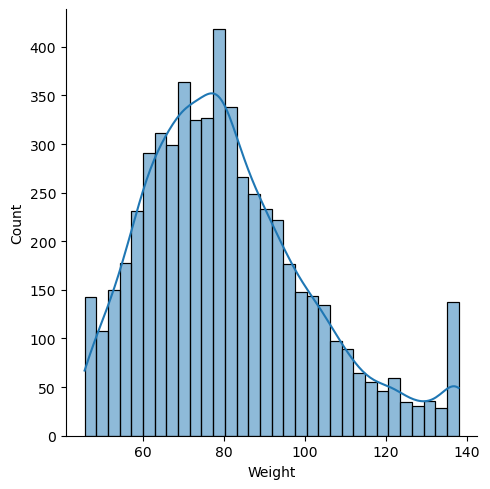

In [95]:
sns.displot(data=eda, x=eda['Weight'], kde = True)
plt.show()